# PTB ECG Dataset Exploration
In this notebook, the PTB Diagnostic ECG dataset and the following data preprocessing operations are explored:



*   Low frequency filtering
*   PCA dimension reduction
*   FFT transformation




In [ ]:
# Installing WFDB
!pip install wfdb

In [9]:
import wfdb
import numpy as np
from scipy import signal
from sklearn.decomposition import PCA
from google.colab import drive
import os
import random

In [4]:
# Mount the driver
drive.mount('/gdrive')

Mounted at /gdrive


In [10]:
# Use the dataset's RECORDS file to get the paths to patients' data
records_to_exclude = [421, 348, 536, 338, 358, 429, 395, 377, 419, 398, 367, 412, 416, 522, 333, 523, 378,
                      375, 397, 519, 530, 406, 524, 355, 356, 407, 417]
record_files = open('/gdrive/MyDrive/Datasets/ptb-diagnostic-ecg-database-1.0.0/RECORDS')
record_files = [os.path.join('/gdrive/MyDrive/Datasets/ptb-diagnostic-ecg-database-1.0.0/', file) for file in record_files.read().split('\n')][:-1]
# record_files = [i for j, i in enumerate(record_files) if j not in records_to_exclude]

In [ ]:
print('Total number of records: {}'.format(len(record_files)))

diagnosis_categories = {}

for record_file in record_files:
  record_data = wfdb.io.rdrecord(record_file)
  diagnosis = record_data.comments[4]

  if not diagnosis in diagnosis_categories:
    diagnosis_categories[diagnosis] = 1
  else:
    diagnosis_categories[diagnosis] += 1

In [22]:
for item in diagnosis_categories.items():
  print(item)

('Reason for admission: Myocardial infarction', 368)
('Reason for admission: Healthy control', 80)
('Reason for admission: Valvular heart disease', 6)
('Reason for admission: Dysrhythmia', 16)
('Reason for admission: Heart failure (NYHA 2)', 1)
('Reason for admission: Heart failure (NYHA 3)', 1)
('Reason for admission: Heart failure (NYHA 4)', 1)
('Reason for admission: Palpitation', 1)
('Reason for admission: Cardiomyopathy', 17)
('Reason for admission: Stable angina', 2)
('Reason for admission: Hypertrophy', 7)
('Reason for admission: Bundle branch block', 17)
('Reason for admission: Unstable angina', 1)
('Reason for admission: Myocarditis', 4)


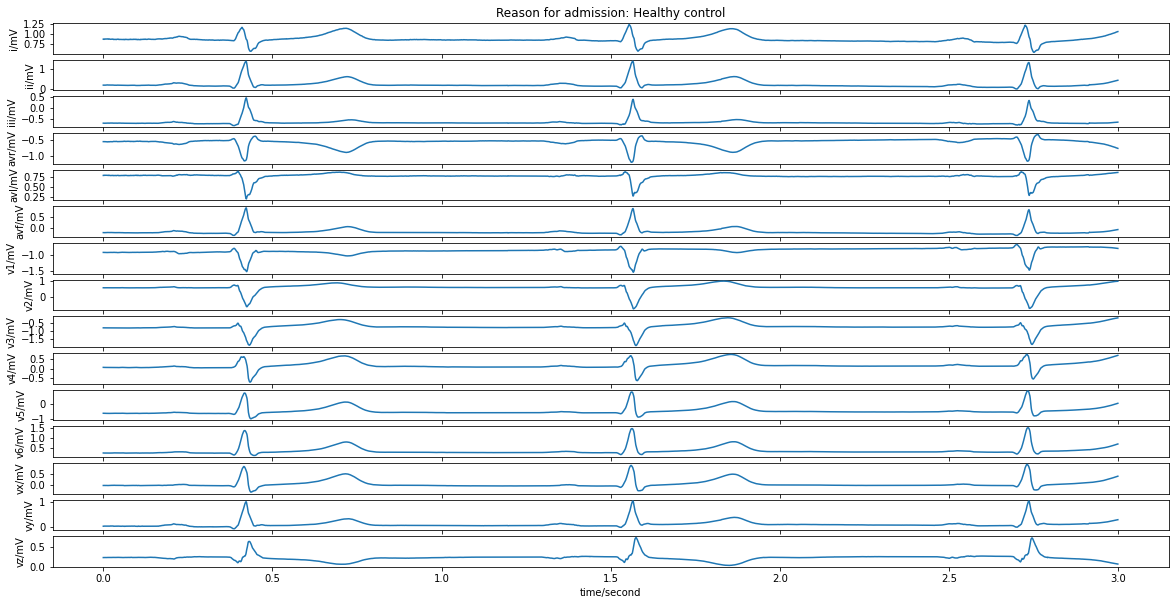

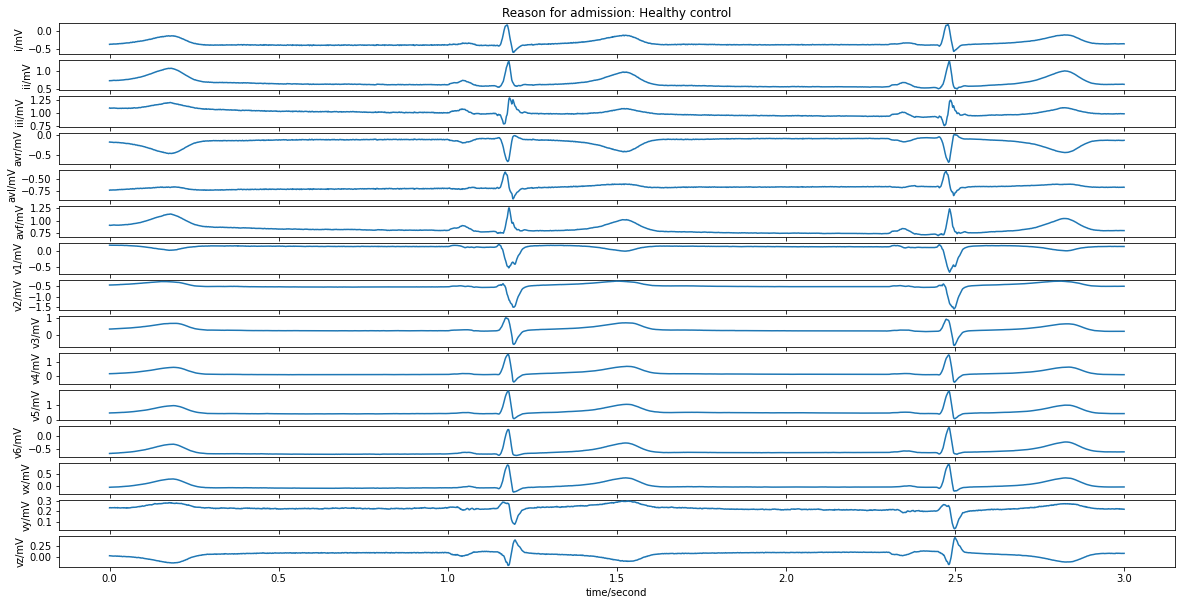

In [33]:
# Plot healthy samples
num_plots = 0
for i in range(len(record_files)):
  record_file = random.choice(record_files)
  record_data = wfdb.io.rdrecord(record_file, sampto=3000)

  diagnosis = record_data.comments[4]

  if num_plots is 2:
    break

  if 'Healthy' in diagnosis:
    wfdb.plot_wfdb(record=record_data,
                  time_units='seconds', title=diagnosis,
                  figsize=(20,10))
    
    num_plots += 1


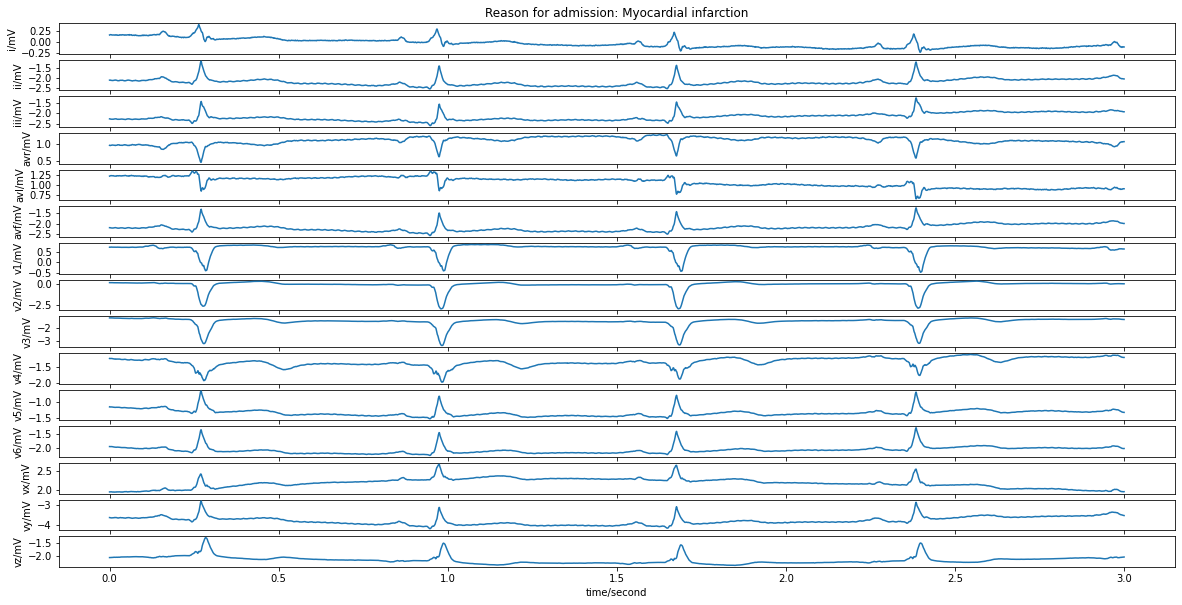

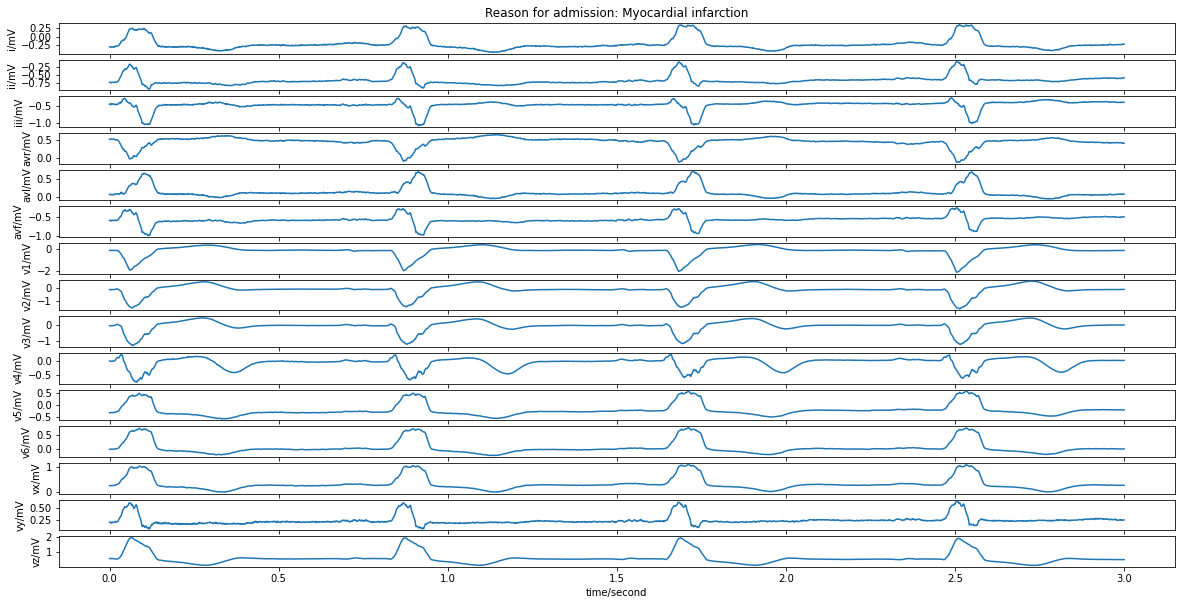

In [34]:
# Plot healthy samples
num_plots = 0
for i in range(len(record_files)):
  record_file = random.choice(record_files)
  record_data = wfdb.io.rdrecord(record_file, sampto=3000)

  diagnosis = record_data.comments[4]

  if num_plots is 2:
    break

  if 'Myocardial' in diagnosis:
    wfdb.plot_wfdb(record=record_data,
                  time_units='seconds', title=diagnosis,
                  figsize=(20,10))
    
    num_plots += 1